In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [75]:
df=pd.read_csv('Materna-Trace-1/02.csv',delimiter=";",index_col=None, header=0)

In [76]:
df=df.drop(['CPU cores','Disk size [GB]','CPU capacity provisioned [MHZ]','Network received throughput [KB/s]','Network transmitted throughput [KB/s]','CPU usage [MHZ]','Memory capacity provisioned [KB]','Memory usage [KB]','Memory usage [%]','Disk read throughput [KB/s]','Disk write throughput [KB/s]'],axis=1)

In [77]:
df['Datetime'] = pd.to_datetime(df['Timestamp'], format='%d.%m.%Y %H:%M:%S')
df=df.drop(['Timestamp'],axis=1)

In [78]:
df.head()

,CPU usage [%],Datetime
0,"2,5",2015-11-05 00:00:00
1,"2,71",2015-11-05 00:05:00
2,"2,48",2015-11-05 00:10:00
3,"2,62",2015-11-05 00:15:00
4,"2,44",2015-11-05 00:20:00


In [79]:
df['CPU usage [%]'] = df['CPU usage [%]'].str.replace(',', '.').astype(float)
# df['Memory usage [%]'] = df['Memory usage [%]'].str.replace(',', '.').astype(float)
df.head()

,CPU usage [%],Datetime
0,2.50,2015-11-05 00:00:00
1,2.71,2015-11-05 00:05:00
2,2.48,2015-11-05 00:10:00
3,2.62,2015-11-05 00:15:00
4,2.44,2015-11-05 00:20:00


In [80]:
df['CPU_10_min_before'] = df['CPU usage [%]'].shift(1) 
df['CPU_20_min_before'] = df['CPU usage [%]'].shift(2) 
df['CPU_30_min_before'] = df['CPU usage [%]'].shift(3) 
df['hour']=df['Datetime'].dt.hour
df['dayofweek']=df['Datetime'].dt.dayofweek
df['dayodyear']=df['Datetime'].dt.dayofyear
df=df.drop(['Datetime'],axis=1)
df=df.dropna()
df.head()

,CPU usage [%],CPU_10_min_before,CPU_20_min_before,CPU_30_min_before,hour,dayofweek,dayodyear
3,2.62,2.48,2.71,2.50,0,3,309
4,2.44,2.62,2.48,2.71,0,3,309
5,2.45,2.44,2.62,2.48,0,3,309
6,2.61,2.45,2.44,2.62,0,3,309
7,2.42,2.61,2.45,2.44,0,3,309


In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [83]:
train_size = int(len(df) * 0.8)
train_df = df[:train_size]  
test_df = df[train_size:] 
X_train=train_df.drop(columns=['CPU usage [%]'])
y_train=train_df['CPU usage [%]']
X_test=test_df.drop(columns=['CPU usage [%]'])
y_test=test_df['CPU usage [%]']
# test_df.head()

In [84]:
X_train.head()


,CPU_10_min_before,CPU_20_min_before,CPU_30_min_before,hour,dayofweek,dayodyear
3,0.004796,0.007144,0.005001,0,3,309
4,0.006225,0.004796,0.007144,0,3,309
5,0.004388,0.006225,0.004796,0,3,309
6,0.004490,0.004388,0.006225,0,3,309
7,0.006123,0.004490,0.004388,0,3,309


In [85]:
import xgboost as xgb

In [86]:
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_round=50 )

In [87]:
reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],
       verbose=True)
# y_pred=rfc.predict(X_test)

[0]	validation_0-rmse:0.07157	validation_1-rmse:0.31622
[1]	validation_0-rmse:0.05133	validation_1-rmse:0.31581
[2]	validation_0-rmse:0.03731	validation_1-rmse:0.23751
[3]	validation_0-rmse:0.02731	validation_1-rmse:0.23728
[4]	validation_0-rmse:0.02039	validation_1-rmse:0.23711
[5]	validation_0-rmse:0.01590	validation_1-rmse:0.20805
[6]	validation_0-rmse:0.01270	validation_1-rmse:0.21758
[7]	validation_0-rmse:0.01061	validation_1-rmse:0.19566
[8]	validation_0-rmse:0.00926	validation_1-rmse:0.18039
[9]	validation_0-rmse:0.00845	validation_1-rmse:0.18231
[10]	validation_0-rmse:0.00801	validation_1-rmse:0.18384
[11]	validation_0-rmse:0.00770	validation_1-rmse:0.18533
[12]	validation_0-rmse:0.00749	validation_1-rmse:0.17926
[13]	validation_0-rmse:0.00730	validation_1-rmse:0.17441
[14]	validation_0-rmse:0.00723	validation_1-rmse:0.17678
[15]	validation_0-rmse:0.00715	validation_1-rmse:0.17972
[16]	validation_0-rmse:0.00704	validation_1-rmse:0.18222
[17]	validation_0-rmse:0.00701	validation

C:\Users\Asush\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:05:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "early_stopping_round" } are not used.

  warnings.warn(smsg, UserWarning)


[50]	validation_0-rmse:0.00611	validation_1-rmse:0.18742
[51]	validation_0-rmse:0.00610	validation_1-rmse:0.18741
[52]	validation_0-rmse:0.00609	validation_1-rmse:0.18743
[53]	validation_0-rmse:0.00608	validation_1-rmse:0.18742
[54]	validation_0-rmse:0.00607	validation_1-rmse:0.18743
[55]	validation_0-rmse:0.00606	validation_1-rmse:0.18743
[56]	validation_0-rmse:0.00604	validation_1-rmse:0.18725
[57]	validation_0-rmse:0.00604	validation_1-rmse:0.18723
[58]	validation_0-rmse:0.00604	validation_1-rmse:0.18726
[59]	validation_0-rmse:0.00604	validation_1-rmse:0.18726
[60]	validation_0-rmse:0.00603	validation_1-rmse:0.18726
[61]	validation_0-rmse:0.00602	validation_1-rmse:0.18727
[62]	validation_0-rmse:0.00601	validation_1-rmse:0.18728
[63]	validation_0-rmse:0.00601	validation_1-rmse:0.18729
[64]	validation_0-rmse:0.00600	validation_1-rmse:0.18747
[65]	validation_0-rmse:0.00598	validation_1-rmse:0.18746
[66]	validation_0-rmse:0.00597	validation_1-rmse:0.18746
[67]	validation_0-rmse:0.00596	

[193]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[194]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[195]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[196]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[197]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[198]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[199]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[200]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[201]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[202]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[203]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[204]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[205]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[206]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[207]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[208]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[209]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[210]	validati

[335]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[336]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[337]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[338]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[339]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[340]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[341]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[342]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[343]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[344]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[345]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[346]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[347]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[348]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[349]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[350]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[351]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[352]	validati

[477]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[478]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[479]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[480]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[481]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[482]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[483]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[484]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[485]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[486]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[487]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[488]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[489]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[490]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[491]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[492]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[493]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[494]	validati

[619]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[620]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[621]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[622]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[623]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[624]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[625]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[626]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[627]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[628]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[629]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[630]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[631]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[632]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[633]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[634]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[635]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[636]	validati

[761]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[762]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[763]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[764]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[765]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[766]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[767]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[768]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[769]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[770]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[771]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[772]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[773]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[774]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[775]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[776]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[777]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[778]	validati

[903]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[904]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[905]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[906]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[907]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[908]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[909]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[910]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[911]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[912]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[913]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[914]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[915]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[916]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[917]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[918]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[919]	validation_0-rmse:0.00595	validation_1-rmse:0.18741
[920]	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [88]:
y_pred=reg.predict(X_test)

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Print the metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.4836
Mean Absolute Error: 0.1130
Mean Squared Error: 0.0351
Root Mean Squared Error: 0.1874


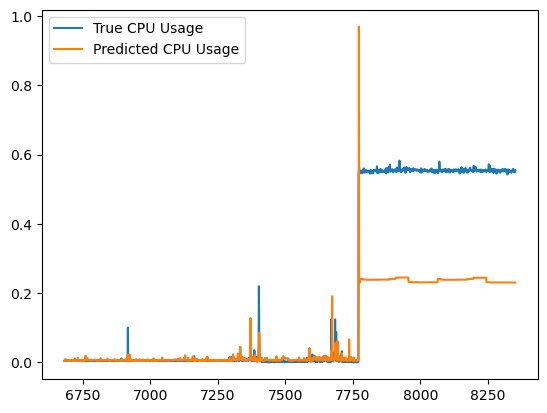

In [91]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - R-squared: {r2_rf:.4f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf:.4f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf:.4f}")

Random Forest - R-squared: 0.9353
Random Forest - Mean Absolute Error: 0.0404
Random Forest - Root Mean Squared Error: 0.0663


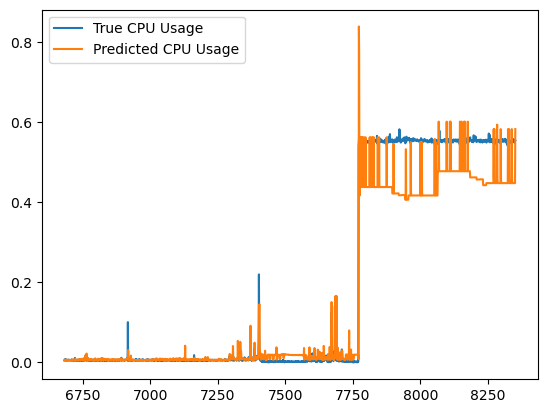

In [94]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_rf, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [95]:
from sklearn.ensemble import GradientBoostingRegressor


In [96]:

# Instantiate the GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1000)

# Fit the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr.predict(X_test)

# Evaluate the model
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting - R-squared: {r2_gbr:.4f}")
print(f"Gradient Boosting - Mean Absolute Error: {mae_gbr:.4f}")
print(f"Gradient Boosting - Root Mean Squared Error: {rmse_gbr:.4f}")

Gradient Boosting - R-squared: 0.6664
Gradient Boosting - Mean Absolute Error: 0.0883
Gradient Boosting - Root Mean Squared Error: 0.1506


In [97]:
# Evaluate the model
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting - R-squared: {r2_gbr:.4f}")
print(f"Gradient Boosting - Mean Absolute Error: {mae_gbr:.4f}")
print(f"Gradient Boosting - Root Mean Squared Error: {rmse_gbr:.4f}")

Gradient Boosting - R-squared: 0.6664
Gradient Boosting - Mean Absolute Error: 0.0883
Gradient Boosting - Root Mean Squared Error: 0.1506


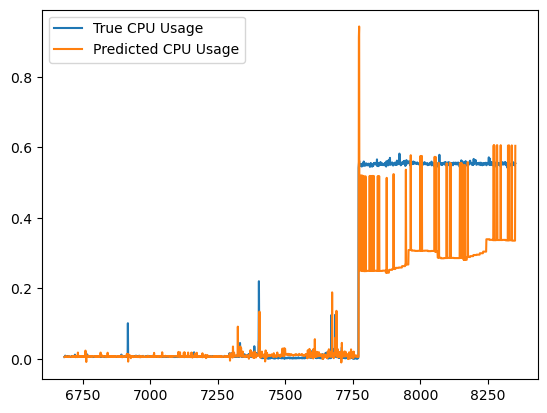

In [98]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_gbr, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [99]:
  from sklearn.neighbors import KNeighborsRegressor

In [100]:
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

In [101]:
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"KNN - R-squared: {r2_knn:.4f}")
print(f"KNN - Mean Absolute Error: {mae_knn:.4f}")
print(f"KNN - Root Mean Squared Error: {rmse_knn:.4f}")

KNN - R-squared: -0.5246
KNN - Mean Absolute Error: 0.1921
KNN - Root Mean Squared Error: 0.3220


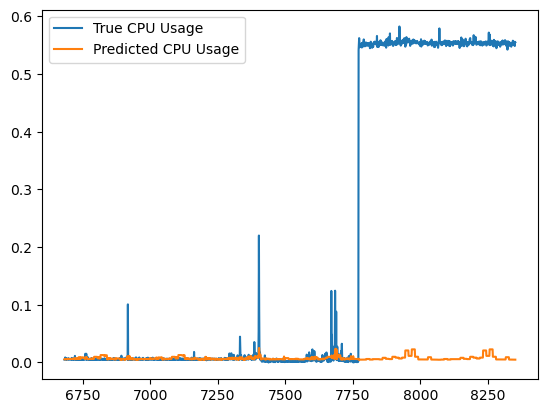

In [102]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_knn, label='Predicted CPU Usage')
plt.legend()
plt.show()

In [104]:

import lightgbm as lgb

In [73]:
lgb_reg = lgb.LGBMRegressor(n_estimators=1000)

# Fit the model
lgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

# Make predictions
y_pred_lgb = lgb_reg.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 6679, number of used features: 6
[LightGBM] [Info] Start training from score 0.073463


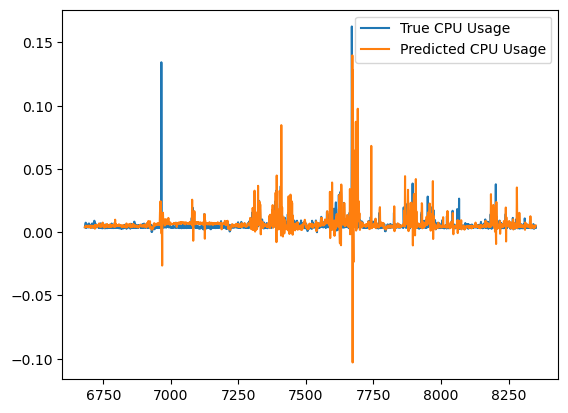

In [74]:
plt.plot(y_test.index, y_test, label='True CPU Usage')
plt.plot(y_test.index, y_pred_lgb, label='Predicted CPU Usage')
plt.legend()
plt.show()